In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

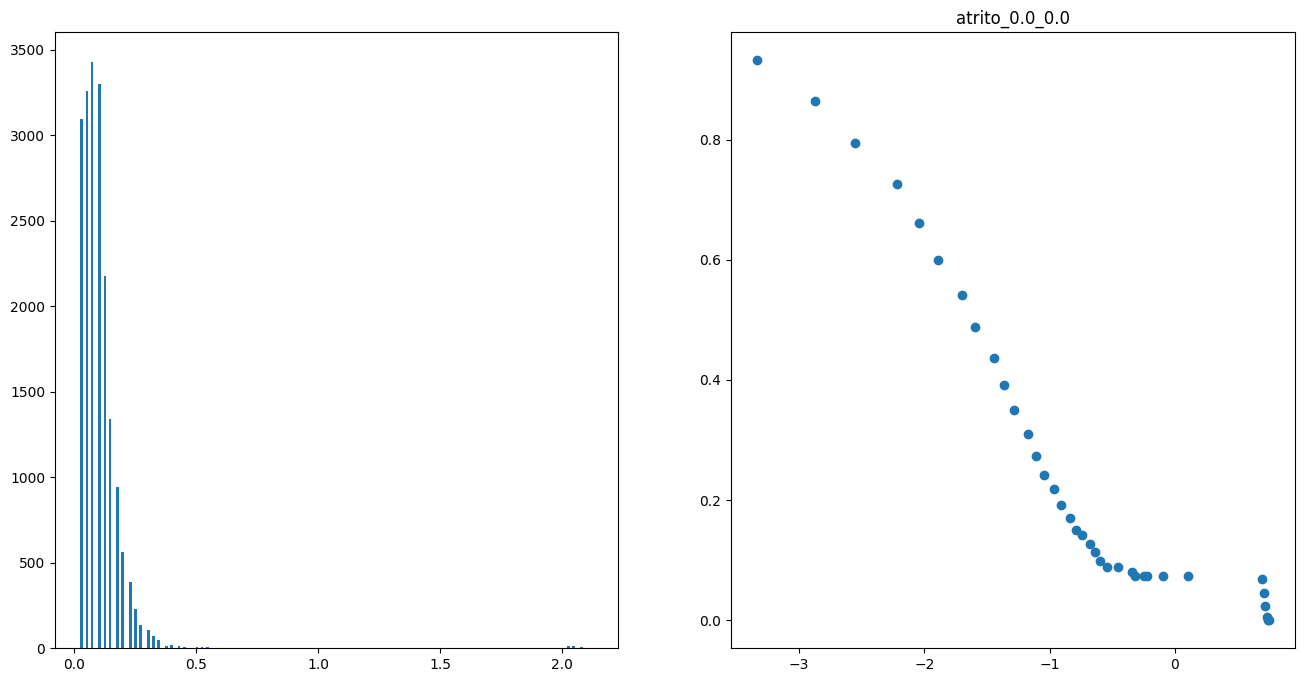

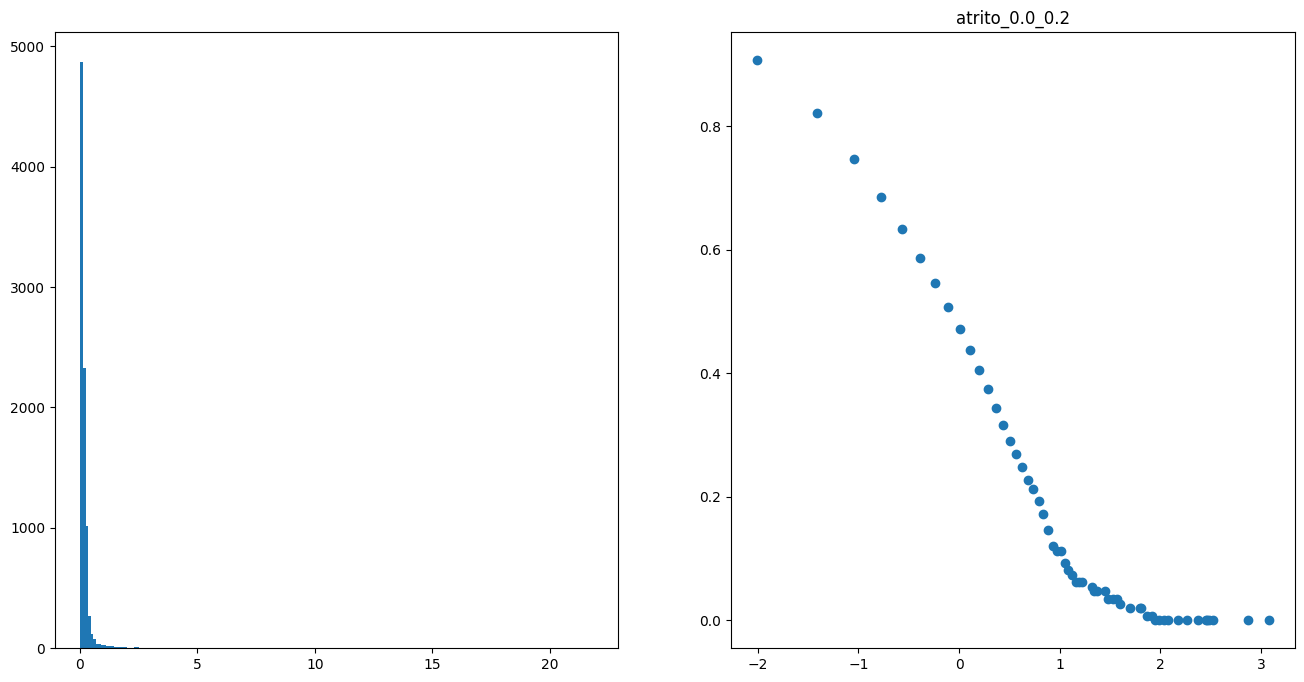

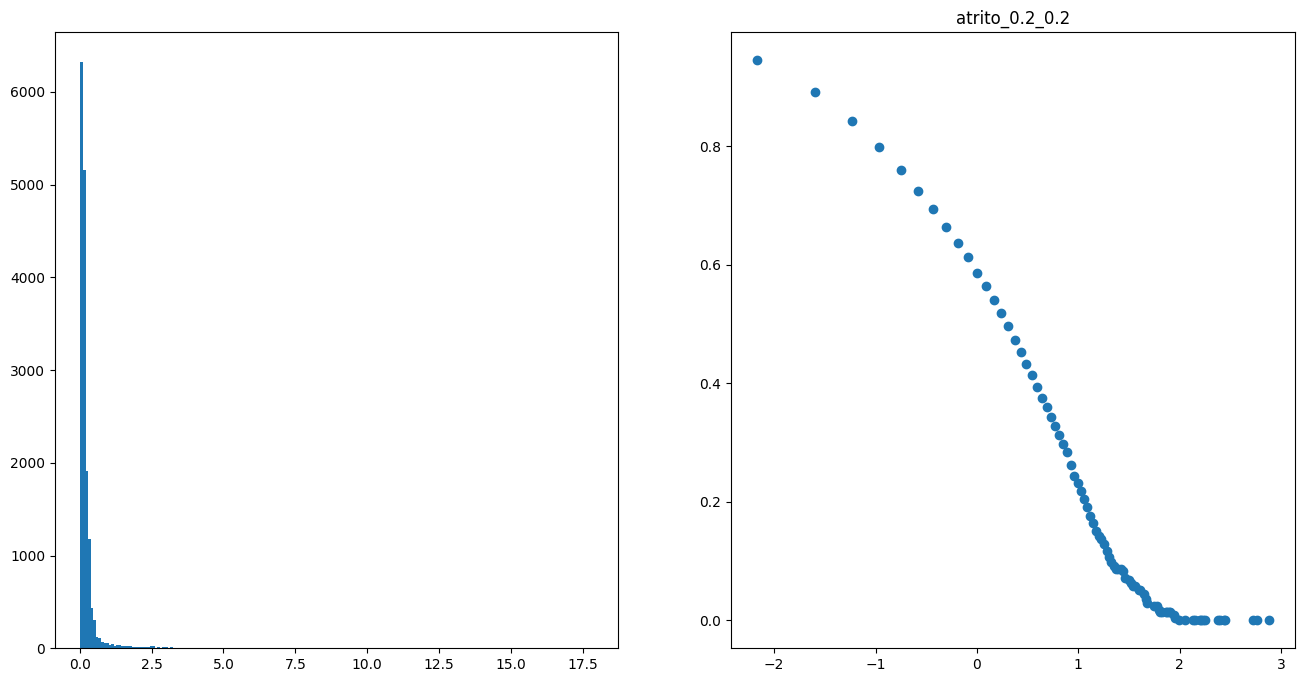

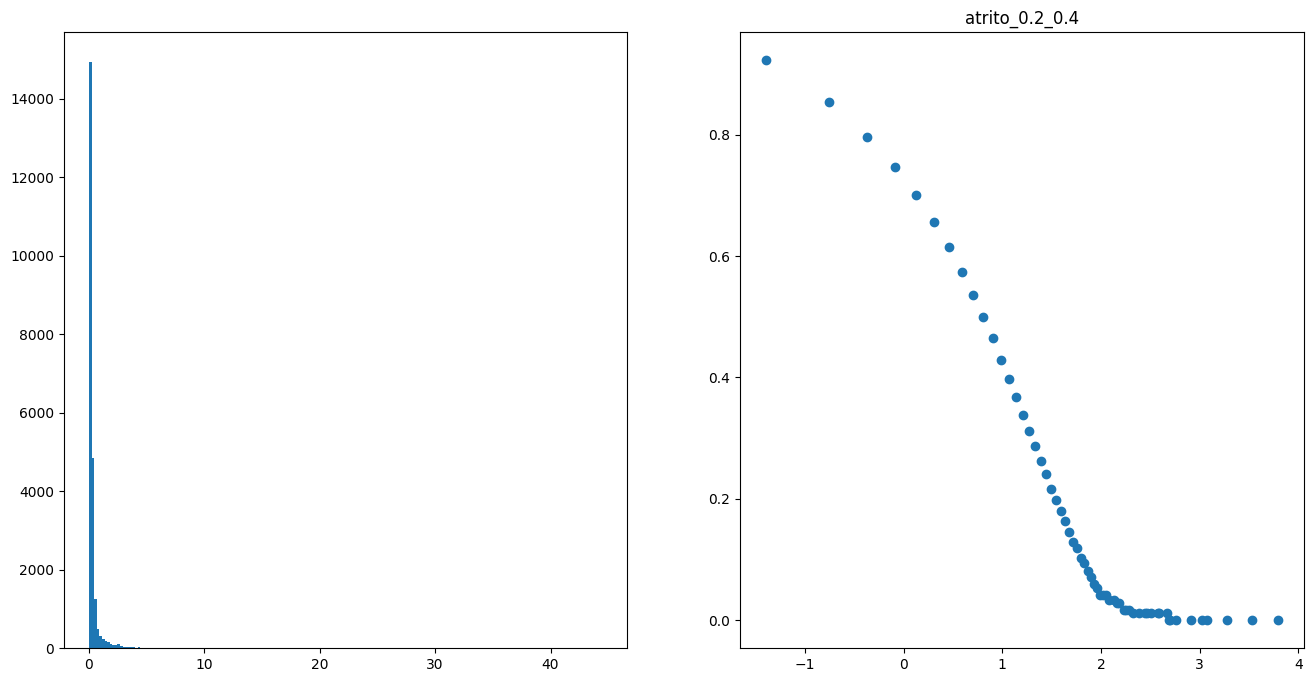

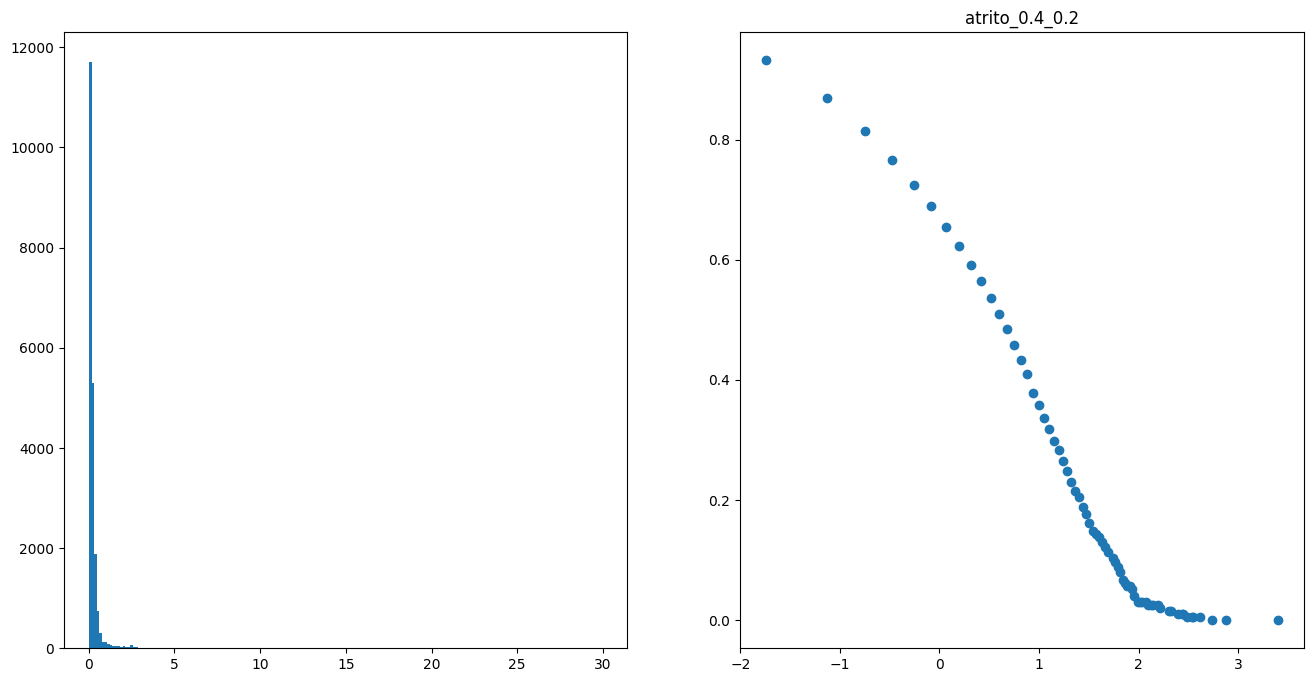

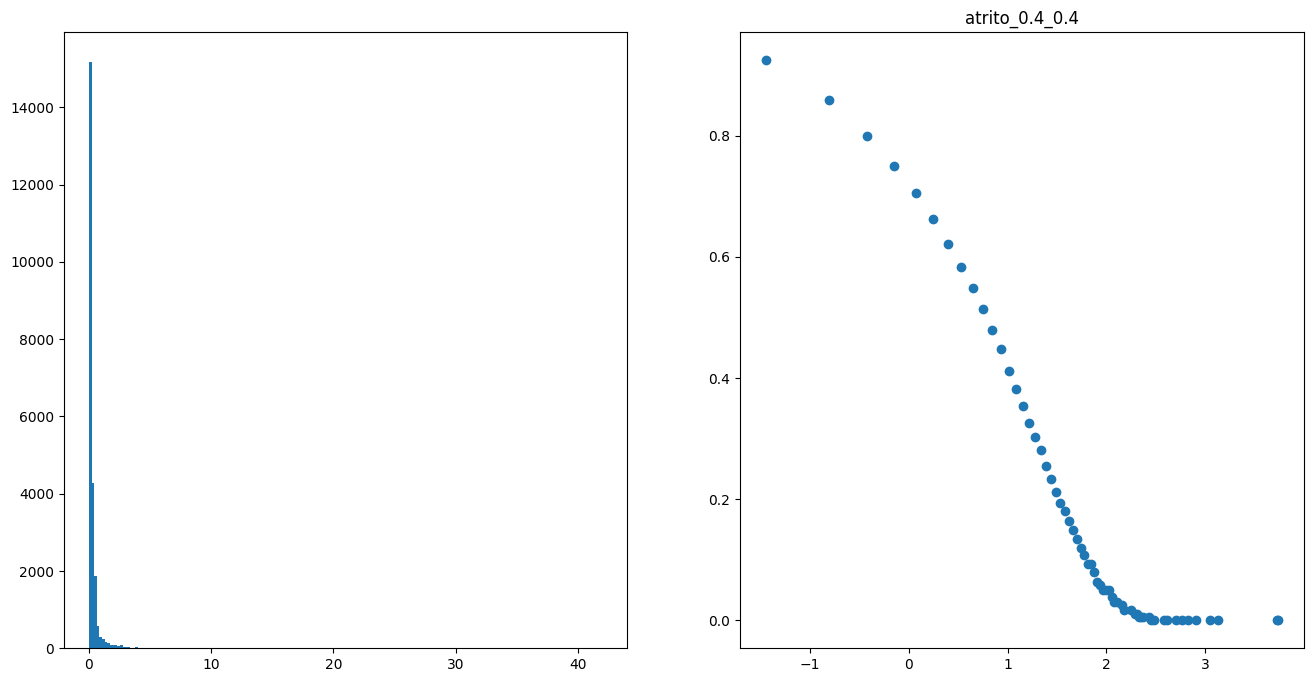

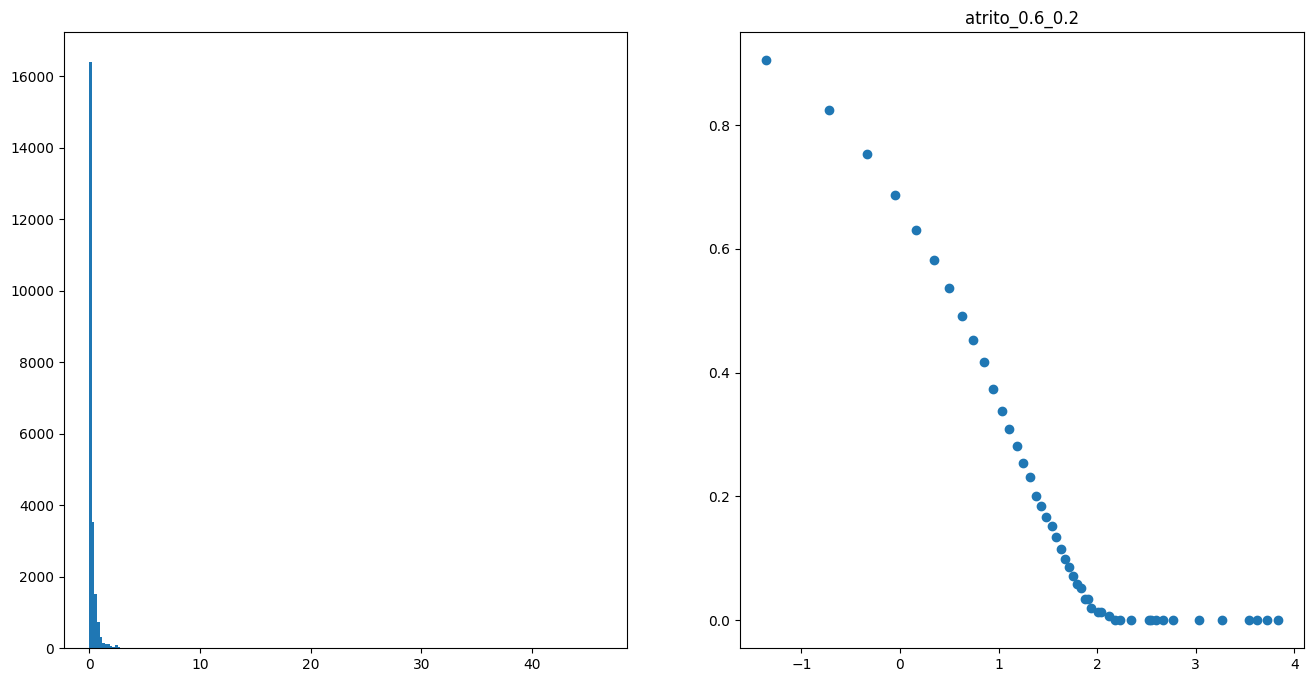

In [4]:
path = "./dados_silo_python/"
pastas = os.listdir(path)

for pasta in pastas:
    dados_concatenados = pd.DataFrame()
    for arquivo in os.listdir(os.path.join(path, pasta)):
        file_path = os.path.join(path, pasta, arquivo)
        dados = pd.read_csv(file_path, header=None, sep=" ", names=["time", "value"])
        dados['cumulative_time'] = dados['time'].cumsum()  # Acumular os tempos
        dados_concatenados = pd.concat([dados_concatenados, dados])

    # Plotar os gráficos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    plt.title(pasta)

    # Histograma dos tempos
    times = dados_concatenados['time']
    hist_data = ax1.hist(times, bins=200)
    x = hist_data[1][1:]  # Coordenadas do bin
    y = hist_data[0]      # Alturas do histograma

    # Scatter plot dos dados logarítmicos
    x = x[y > 0]
    y = y[y > 0]
    y = np.log10(y) / np.sum(np.log10(y))
    y = np.cumsum(y)
    ax2.scatter(np.log(x), 1 - y)

    plt.show()

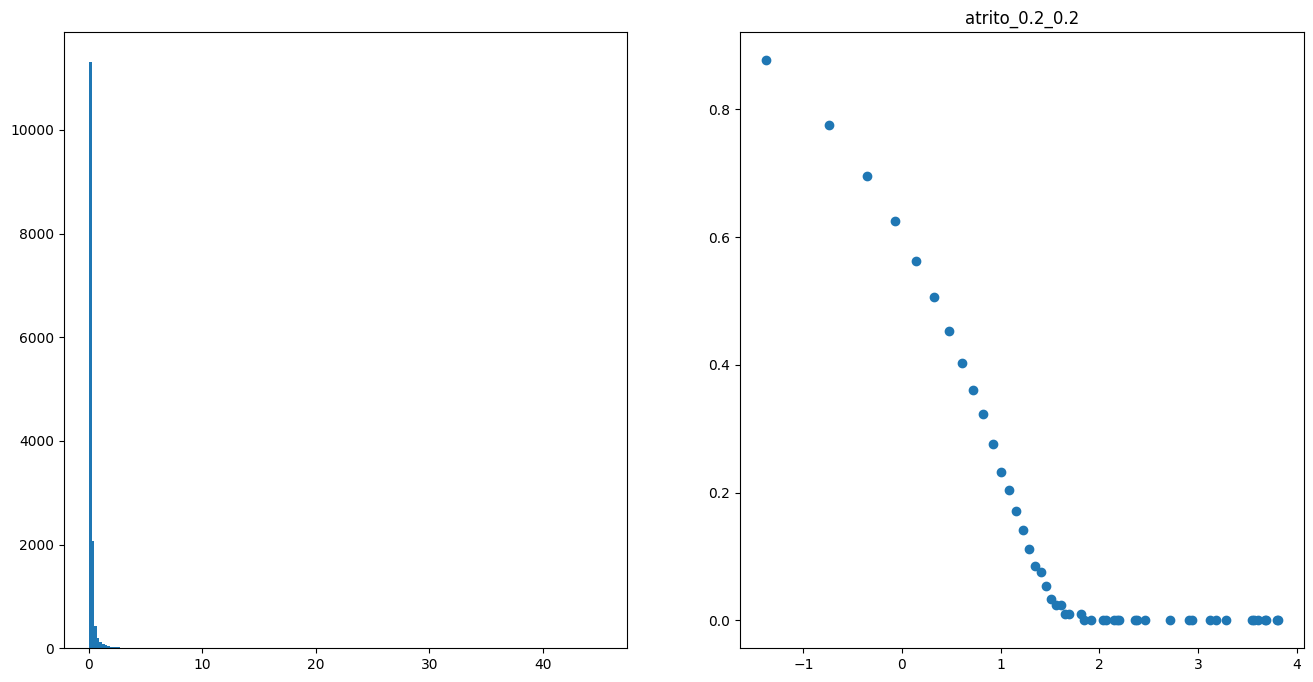

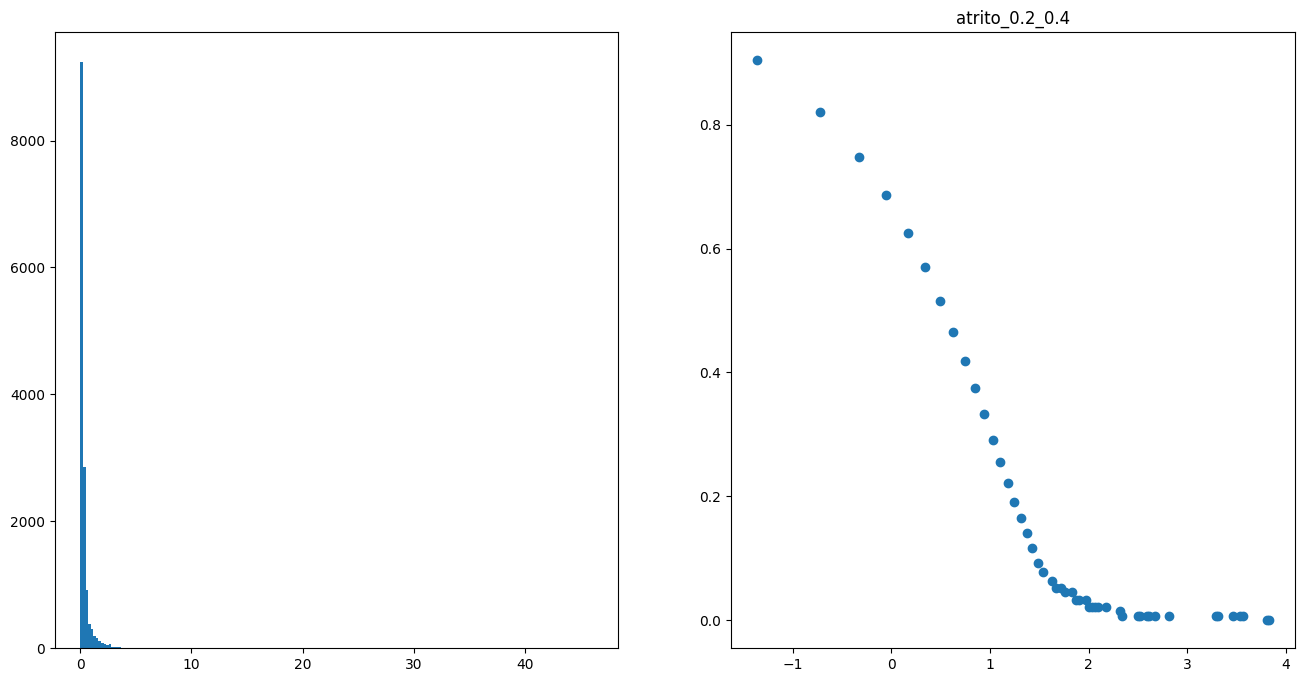

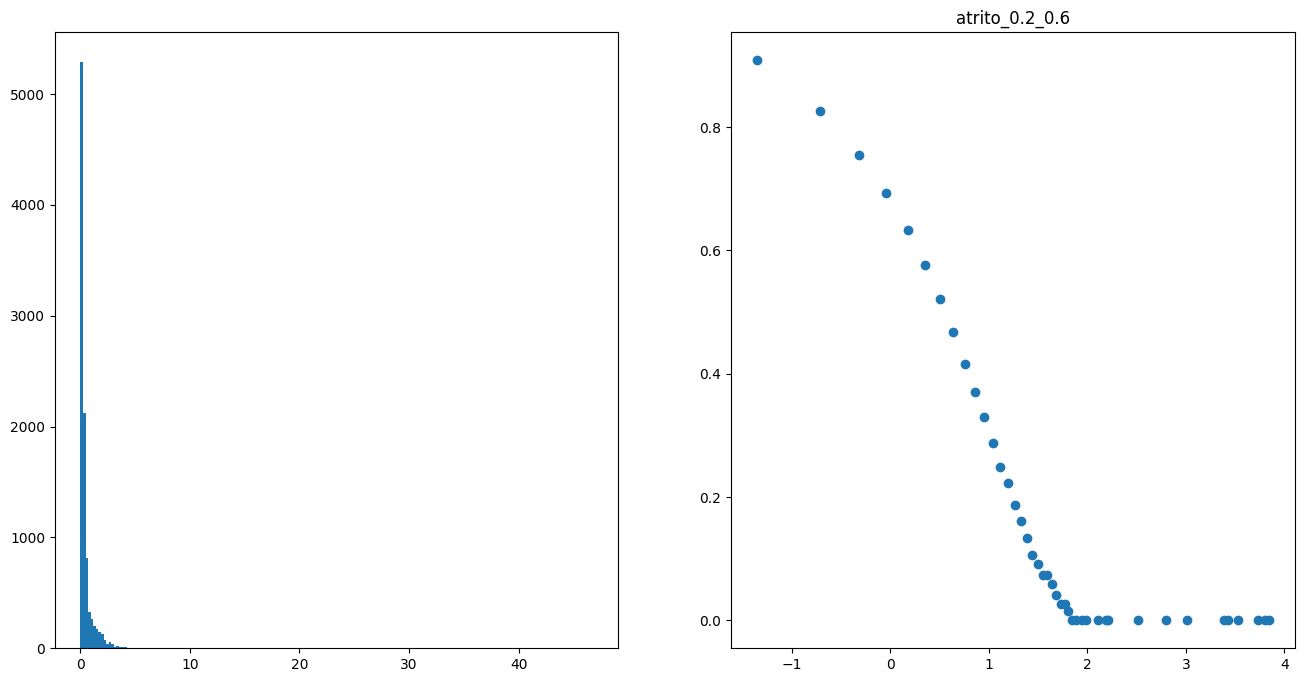

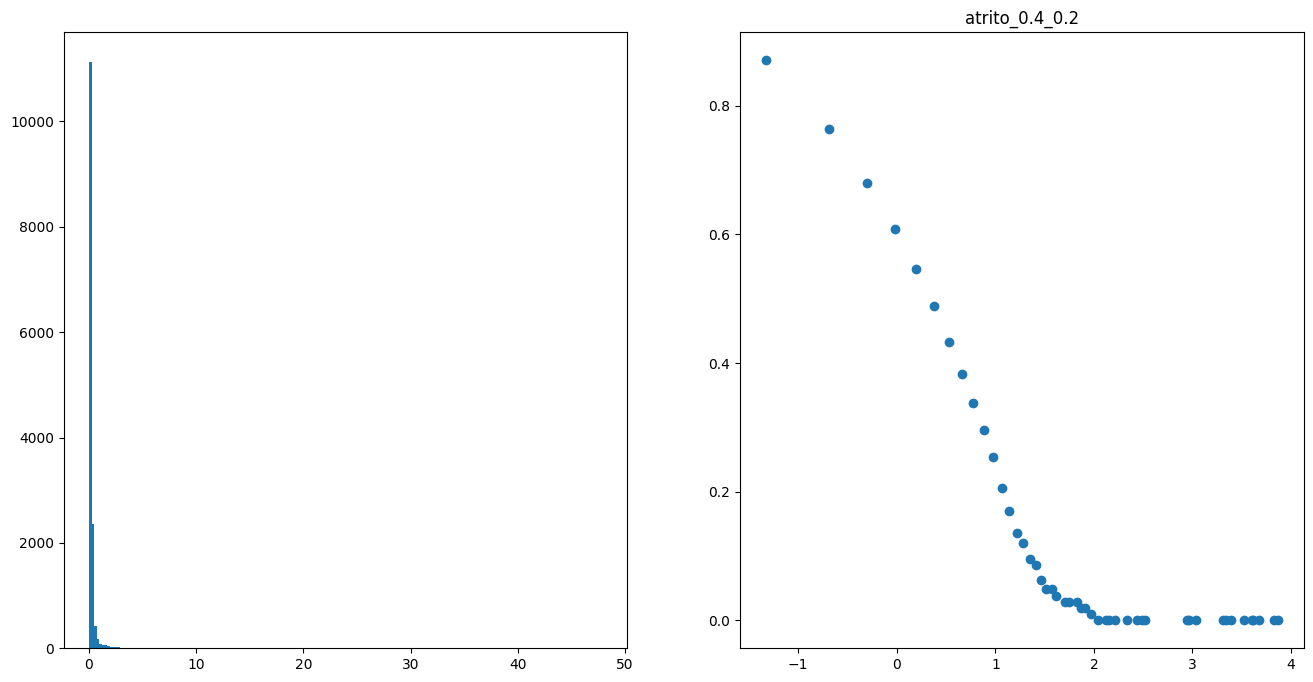

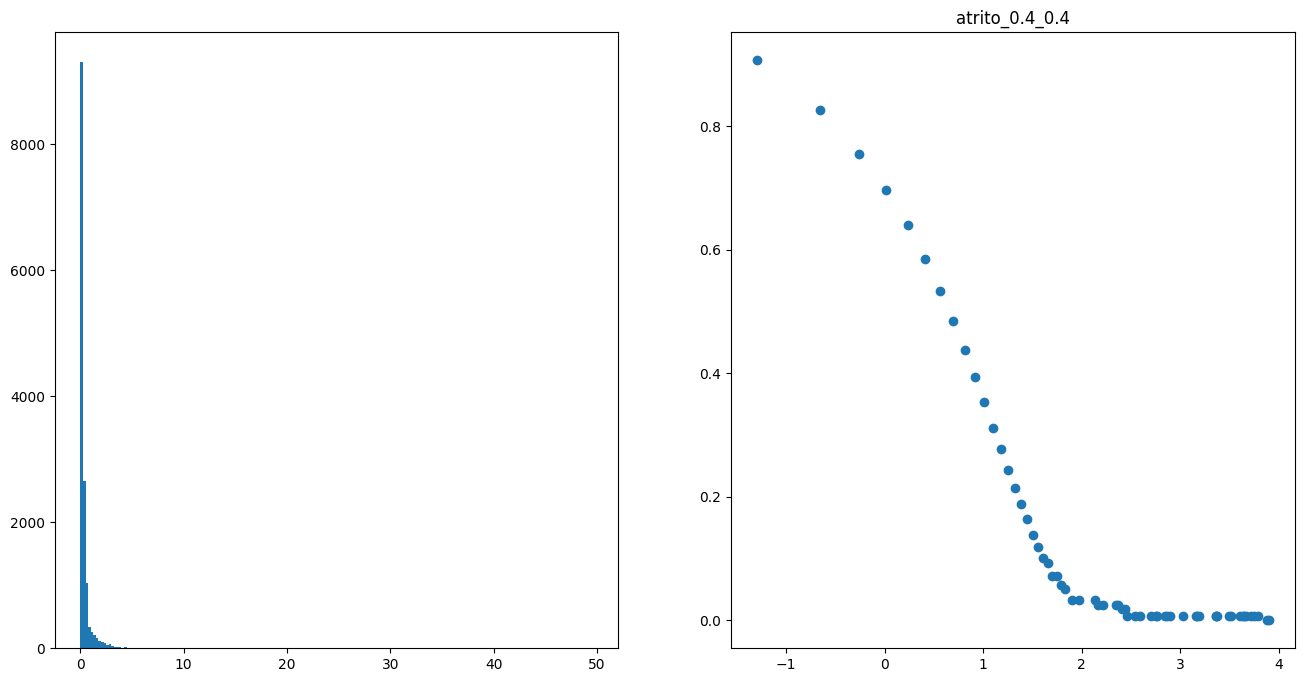

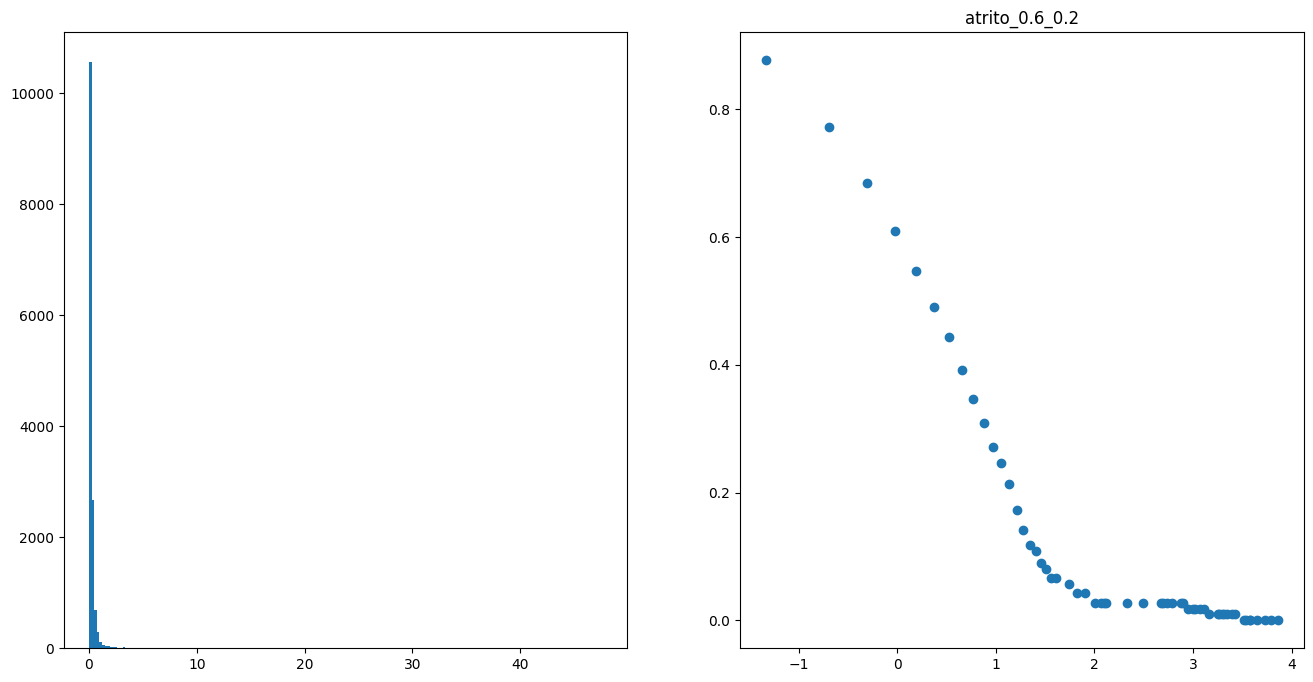

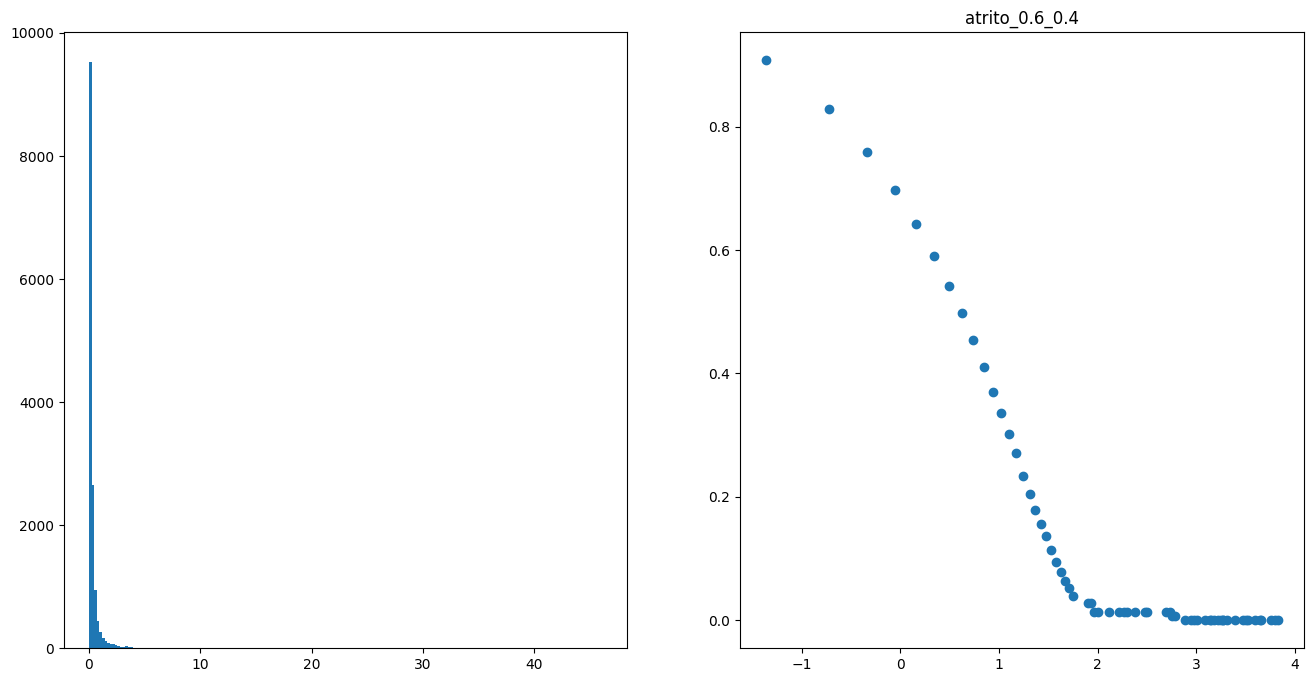

In [16]:
path = "./dados_silo_python_obs/"
pastas = os.listdir(path)

for pasta in pastas:
    dados_concatenados = pd.DataFrame()
    for arquivo in os.listdir(os.path.join(path, pasta)):
        file_path = os.path.join(path, pasta, arquivo)
        dados = pd.read_csv(file_path, header=None, sep=" ", names=["time", "value"])
        dados['cumulative_time'] = dados['time'].cumsum()  # Acumular os tempos
        dados_concatenados = pd.concat([dados_concatenados, dados])

    # Plotar os gráficos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    plt.title(pasta)

    # Histograma dos tempos
    times = dados_concatenados['time']
    hist_data = ax1.hist(times, bins=200)
    x = hist_data[1][1:]  # Coordenadas do bin
    y = hist_data[0]      # Alturas do histograma

    # Scatter plot dos dados logarítmicos
    x = x[y > 0]
    y = y[y > 0]
    y = np.log10(y) / np.sum(np.log10(y))
    y = np.cumsum(y)
    ax2.scatter(np.log(x), 1 - y)

    plt.show()

In [33]:
caminho_base = "C:/Users/Marcio Vaz/Documents/analise_dados_graos"
pastas = ['dados_silo_python', 'dados_silo_python_obs']

dados_por_pastas = {}

cores = {
    'dados_silo_python': 'black',
    'dados_silo_python_obs': 'red' 
}
x = []
for pasta in pastas:
    x.append(os.listdir(caminho_base+'/'+pasta))

conjunto1 = set(x[0])
conjunto2 = set(x[1])

# Encontrar a interseção entre os conjuntos
elementos_em_comum = conjunto1.intersection(conjunto2)

# Converter de volta para uma lista, se necessário
files = list(elementos_em_comum)

print("Elementos em comum:", files)

Elementos em comum: ['atrito_0.4_0.4', 'atrito_0.2_0.4', 'atrito_0.4_0.2', 'atrito_0.6_0.2', 'atrito_0.2_0.2']


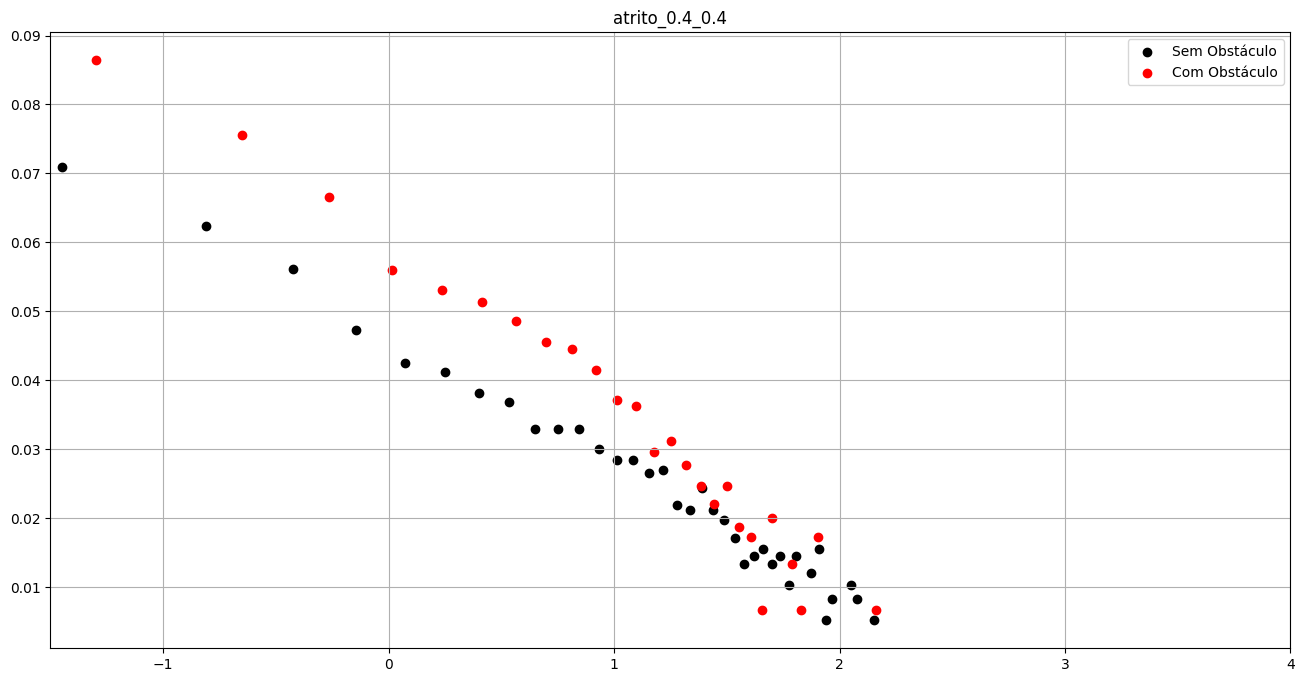

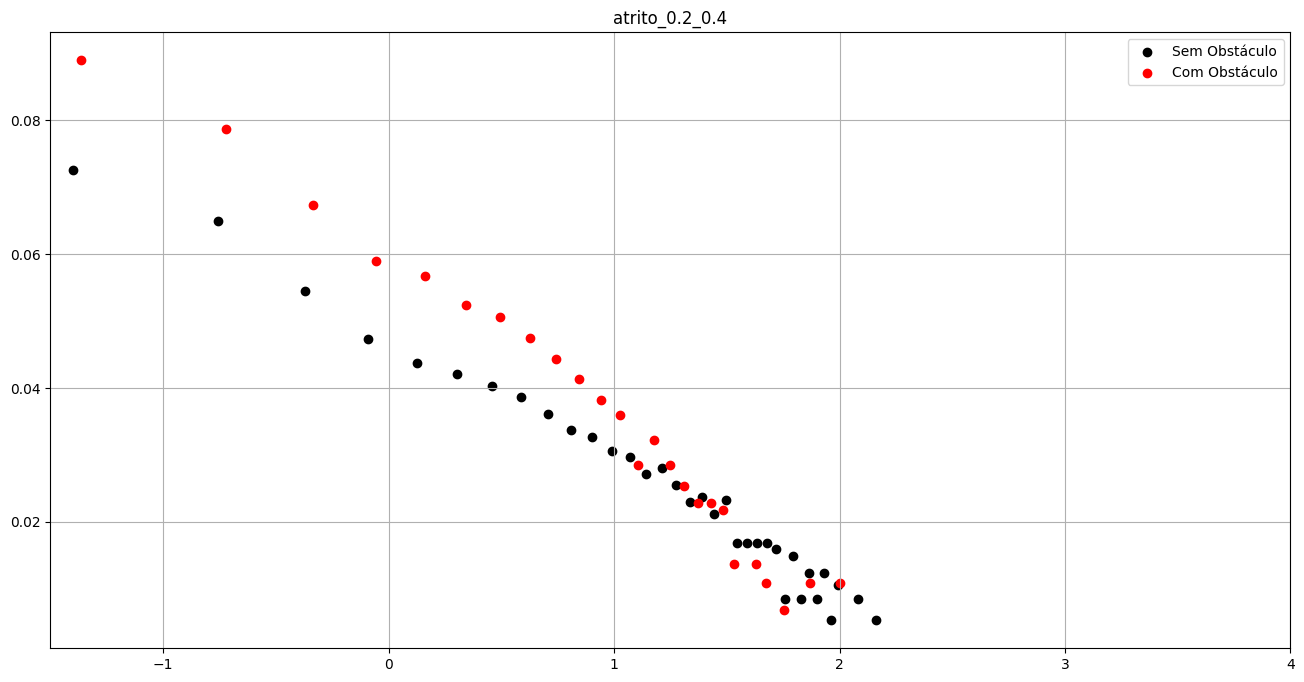

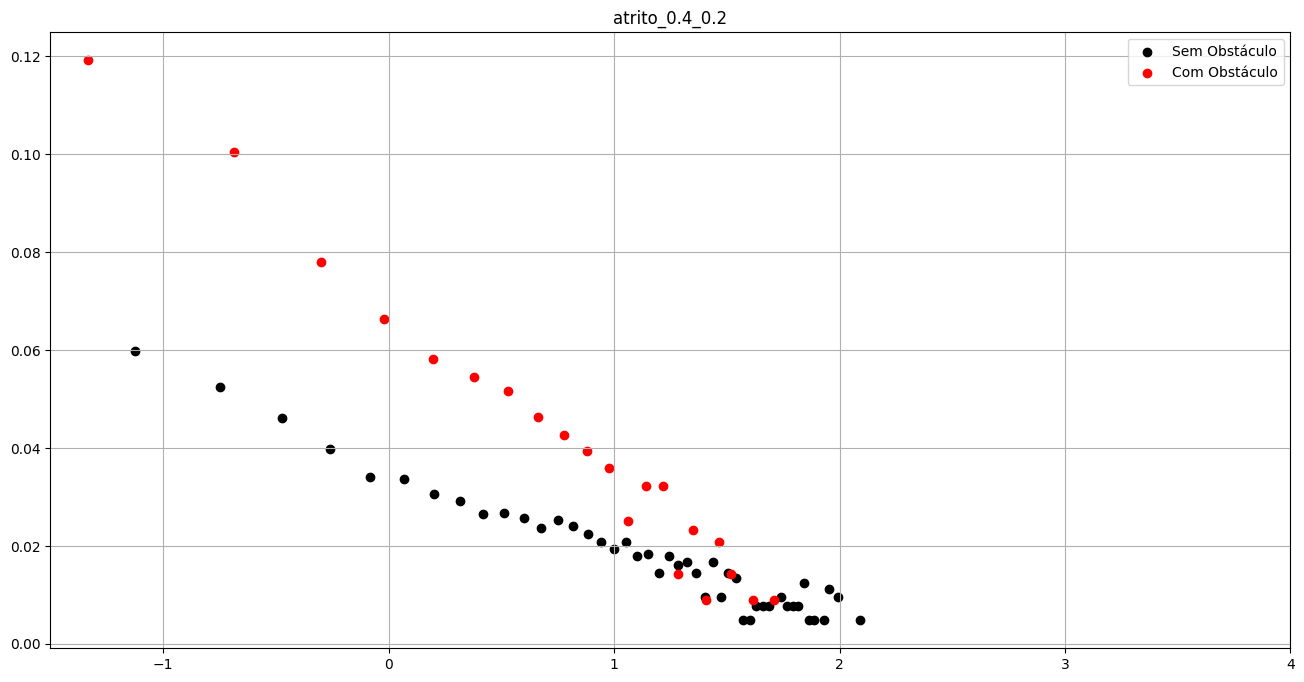

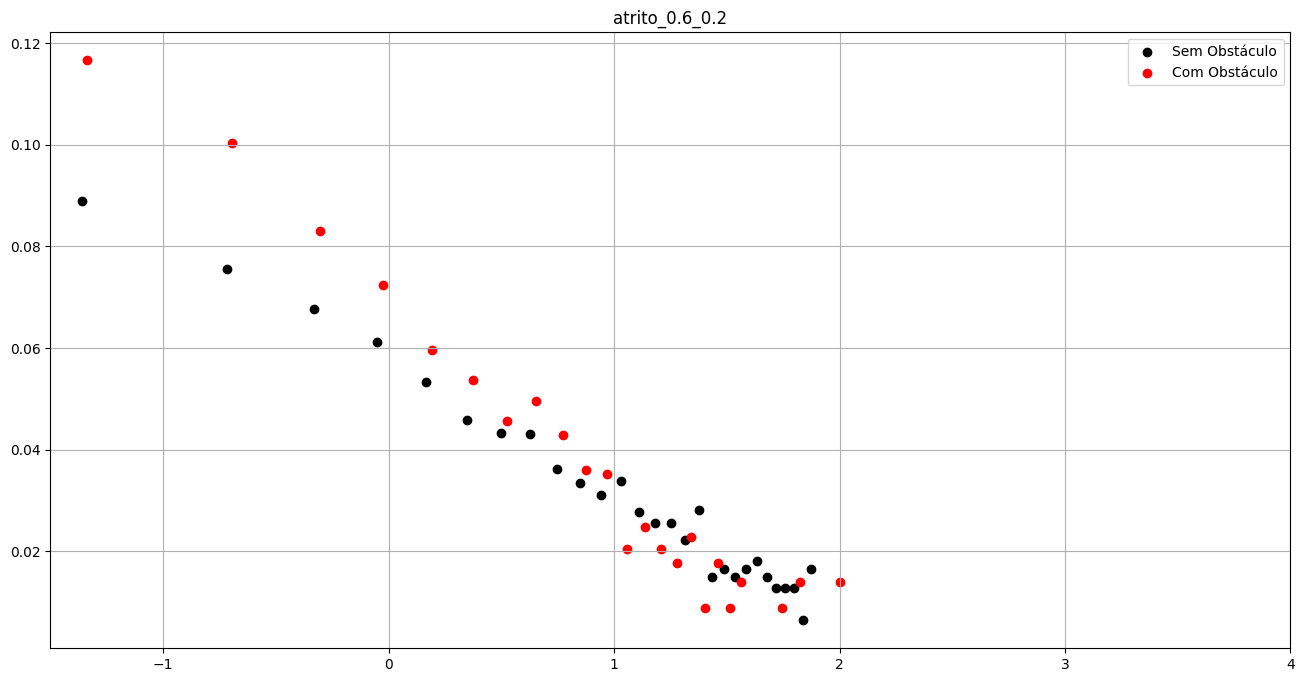

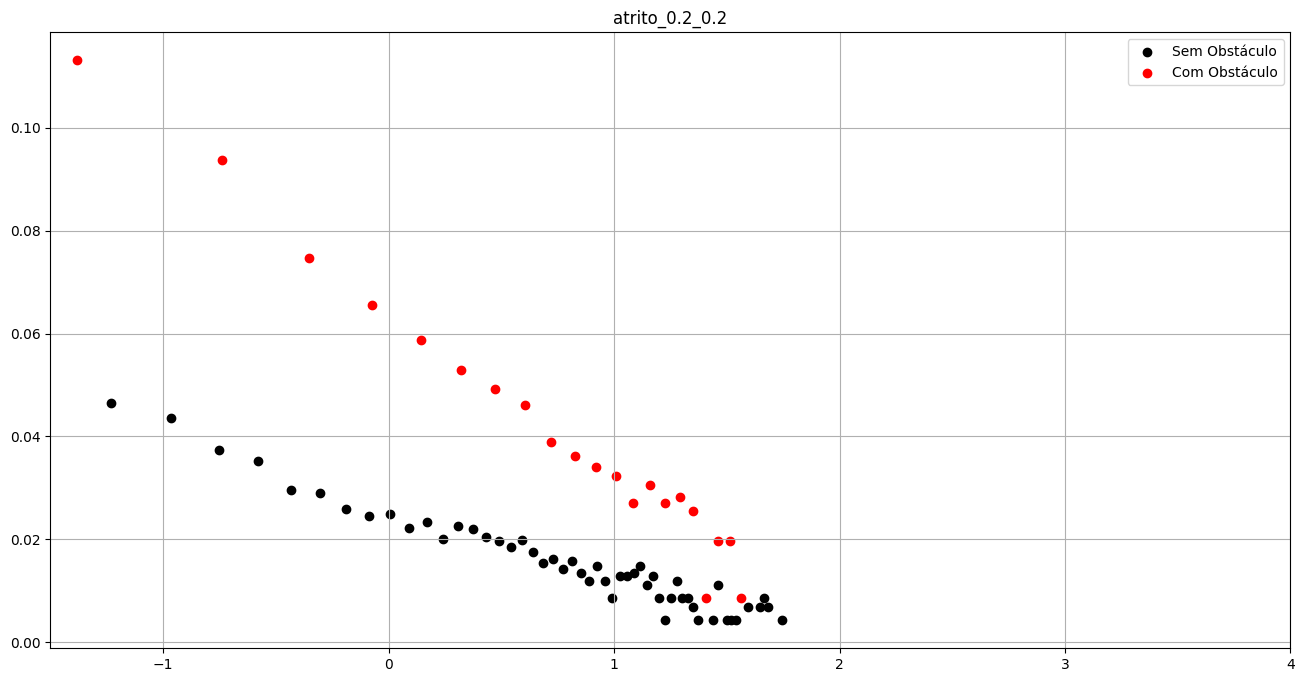

In [83]:
cores = {
    'dados_silo_python': 'black',
    'dados_silo_python_obs': 'red' 
}
legenda = {
    'dados_silo_python': 'Sem Obstáculo',
    'dados_silo_python_obs': 'Com Obstáculo' 
}
for file in files:
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    ax.set_title(file)
    for pasta in pastas:
        dados = os.listdir(caminho_base+"/"+pasta+"/"+file+'/')
        dados_concatenados = pd.DataFrame()
        for dado in dados:
            dados = pd.read_csv(caminho_base+"/"+pasta+"/"+file+'/'+dado, header=None, sep=" ", names=["time", "value"], skiprows=1)
            dados['cumulative_time'] = dados['time'].cumsum()  # Acumular os tempos
            dados_concatenados = pd.concat([dados_concatenados, dados])
        times = dados_concatenados['time']
        dt = (np.max(times) - np.min(times))/200
        t = np.arange(np.min(times),np.max(times)+dt,dt)
        hist = [0]*len(t)
        for time in times:
            i = 0
            while(t[i] < time):
                i += 1
            hist[i] += 1
        x = t
        y = np.array(hist)
        #hist_data = plt.hist(times, bins=200)
        #plt.show()
        #x = hist_data[1][1:]  # Coordenadas do bin
        #y = hist_data[0]      # Alturas do histograma

        # Scatter plot dos dados logarítmicos
        x = x[y > 0]
        y = y[y > 0]
        y = np.log10(y) / np.sum(np.log10(y))
        y_ = np.cumsum(y)
        x = x[y_< 0.98]
        y = y[y_< 0.98]
        x = x[y > 0]
        y = y[y > 0]
        ax.scatter(np.log(x),y,label = legenda[pasta],c = cores[pasta])
    plt.legend()
    plt.grid()
    plt.xlim(-1.5,4)
    plt.show()